In [1]:
import pandas as pd
import datetime
import numpy as np


from darts import TimeSeries
from darts.models import NBEATSModel

d:\GAME\Anaconda\envs\machinelearning_joseportilla\lib\site-packages\statsforecast\utils.py:237: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "ds": pd.date_range(start="1949-01-01", periods=len(AirPassengers), freq="M"),


In [2]:
df_begin=pd.read_csv('D:\\KULIAH\\teep\AI\\dataset\\52 cells\\CellReports_editmax.csv', parse_dates=['datetime_column'], index_col='datetime_column')
df_begin

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2022-12-31 16:00:00,125.483333,118.30
2022-12-31 16:01:00,125.983333,122.85
2022-12-31 16:02:00,123.616667,113.75
2022-12-31 16:03:00,120.216667,109.20
2022-12-31 16:04:00,150.150000,145.60
...,...,...
2023-01-07 15:55:00,163.800000,150.15
2023-01-07 15:56:00,109.200000,104.65
2023-01-07 15:57:00,136.500000,136.50


In [3]:
series = TimeSeries.from_dataframe(df_begin[['RRU.PrbUsedDl', 'RRU.PrbUsedUl']])
series.values()

array([[125.4833333, 118.3      ],
       [125.9833333, 122.85     ],
       [123.6166667, 113.75     ],
       ...,
       [136.5      , 136.5      ],
       [273.       , 273.       ],
       [273.       , 273.       ]])

<AxesSubplot: xlabel='datetime_column'>

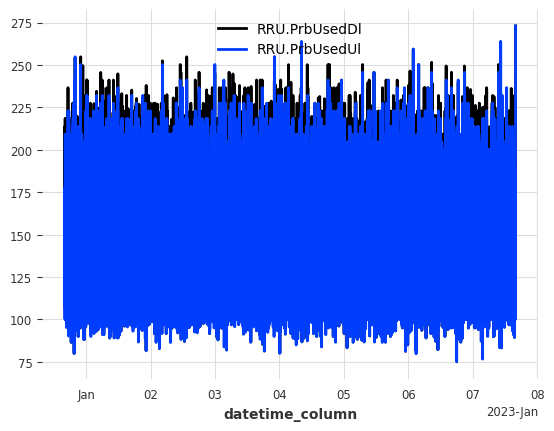

In [4]:
series.plot()

<AxesSubplot: xlabel='datetime_column'>

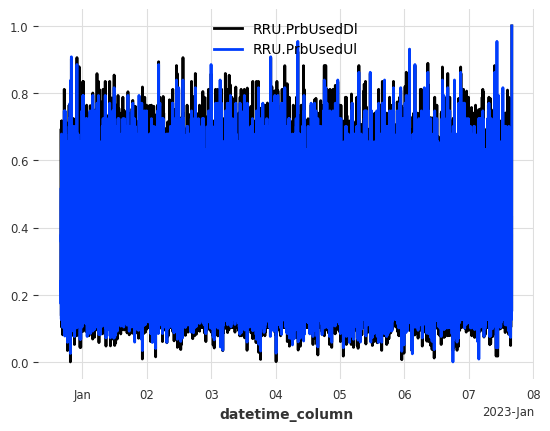

In [5]:
# Normalisasi data
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
scaler = Scaler()
series = scaler.fit_transform(series)
series.plot()

In [6]:
train, val = series.split_after(pd.Timestamp('2023-01-06'))


<AxesSubplot: xlabel='datetime_column'>

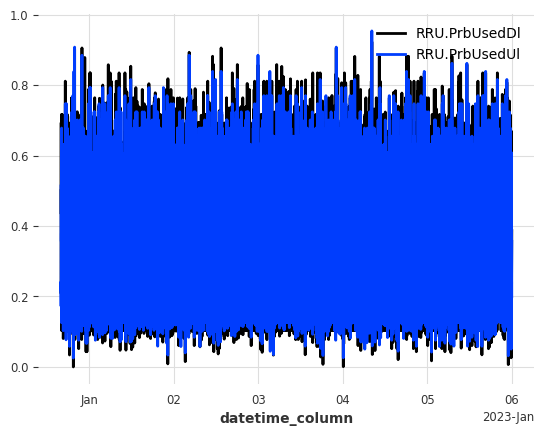

In [7]:
train.plot()

<AxesSubplot: xlabel='datetime_column'>

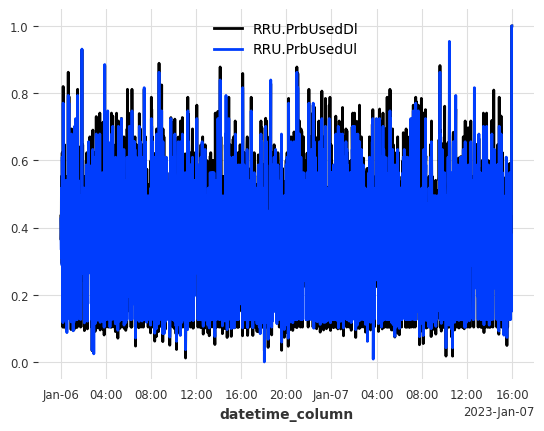

In [8]:
val.plot()

In [9]:
import torch

print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device count: {torch.cuda.device_count()}")
print(f"CUDA device name: {torch.cuda.get_device_name(0)}")


CUDA available: True
CUDA device count: 1
CUDA device name: NVIDIA GeForce RTX 3060 Laptop GPU


In [10]:
import torch
import time
print(torch.cuda.device_count())
for i in range(torch.cuda.device_count()):
    print(torch.cuda.get_device_name(i))

1
NVIDIA GeForce RTX 3060 Laptop GPU


In [11]:

model = NBEATSModel(
    input_chunk_length=60,  # Panjang input window (misalnya 60 menit)
    output_chunk_length=10,  # Panjang prediksi (misalnya 10 menit)
    n_epochs=15,  # Jumlah epoch pelatihan
    random_state=42,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": torch.cuda.device_count() 
    },
)
start_time= time.time()
model.fit(train, val_series=val, verbose=True)
print("--- %s seconds ---" % (time.time() - start_time))

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type             | Params
-----------------------------------------------------
0 | criterion       | MSELoss          | 0     
1 | train_criterion | MSELoss          | 0     
2 | val_criterion   | MSELoss          | 0     
3 | train_metrics   | MetricCollection | 0     
4 | val_metrics     | MetricCollection | 0     
5 | stacks          | ModuleList       | 7.0 M 
----------------------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=15` reached.


--- 297.0457146167755 seconds ---


In [22]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Format the date and time to a string
timestamp = now.strftime("%Y%m%d_%H%M")
timestamp

'20240716_1647'

In [23]:
nama_file='2_%s.pth'%timestamp
model.save(nama_file)

In [24]:
# Prediksi pada data validasi
pred = model.predict(n=5, series=train)  # Prediksi 10 langkah ke depan

# Inversi normalisasi untuk melihat prediksi dalam skala asli
pred = scaler.inverse_transform(pred)

print(f'Predicted PRB downlink and uplink:\n{pred.values()}')


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicted PRB downlink and uplink:
[[164.32987834 138.861905  ]
 [171.56918798 160.06545496]
 [156.96607544 151.50175038]
 [156.78828483 152.4522722 ]
 [164.98164395 145.69695654]]


In [25]:
print(pred.time_index)

DatetimeIndex(['2023-01-06 00:01:00', '2023-01-06 00:02:00',
               '2023-01-06 00:03:00', '2023-01-06 00:04:00',
               '2023-01-06 00:05:00'],
              dtype='datetime64[ns]', name='datetime_column', freq='min')


In [26]:
pred.pd_dataframe()

component,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2023-01-06 00:01:00,164.329878,138.861905
2023-01-06 00:02:00,171.569188,160.065455
2023-01-06 00:03:00,156.966075,151.501750
2023-01-06 00:04:00,156.788285,152.452272
2023-01-06 00:05:00,164.981644,145.696957


In [27]:
df_begin['2023-01-06 00:01:00': '2023-01-06 00:10:00']

,RRU.PrbUsedDl,RRU.PrbUsedUl
datetime_column,,
2023-01-06 00:01:00,163.80,159.25
2023-01-06 00:02:00,150.15,150.15
2023-01-06 00:03:00,154.70,141.05
2023-01-06 00:04:00,186.55,177.45
2023-01-06 00:05:00,141.05,136.50
2023-01-06 00:06:00,182.00,172.90
2023-01-06 00:07:00,136.50,131.95
2023-01-06 00:08:00,200.20,195.65
2023-01-06 00:09:00,154.70,145.60


In [28]:
scaler.inverse_transform(val).values()

array([[163.8 , 159.25],
       [150.15, 150.15],
       [154.7 , 141.05],
       ...,
       [136.5 , 136.5 ],
       [273.  , 273.  ],
       [273.  , 273.  ]])

In [29]:
scaler.inverse_transform(train).values()

array([[125.4833333, 118.3      ],
       [125.9833333, 122.85     ],
       [123.6166667, 113.75     ],
       ...,
       [150.15     , 113.75     ],
       [154.0833333, 145.6      ],
       [154.7      , 145.6      ]])

In [30]:
pred.values()

array([[164.32987834, 138.861905  ],
       [171.56918798, 160.06545496],
       [156.96607544, 151.50175038],
       [156.78828483, 152.4522722 ],
       [164.98164395, 145.69695654]])